# Session 1.3
## Exploratory data analysis in Python

- In the following session we are going to perform an **exploratory data analysis** of a data set
- The goal is to gain a very basic understanding of the structure of the data set and some high-level understanding of the variables and their relationships
- By the end of this notebook, we will be able to answer questions like
    - What is the structure of the data set?
    - What does the data set describe?
    - What is the distribution of a variable look like?
    - Are there any correlations between variables?
- We will load the data set, examine its structure and contents at a high level, explore relationships between the variables in the data set, and ultimately create a correlation matrix for the data set

## 1. First look at the data set
- The very first step in any data analysis is to simply look at the file(s) containing the data
- In many cases the file will be too large to open in a text editor; if this is the case, we could use Python or some other programming language to parse the first few hundred lines of the file to gain some idea of its structure
- In this case, the file size is only ~123 kB; we can open it in a text editor
- Using your favorite text editor (TextEdit, notepad, emacs, ...), open the file located at '.../IntroPython_PredictiveModeling/notebooks/day_1/data/world_indexes.csv'
- Inspect the data for a couple minutes

- We can see that the file consists of numbers and words separated by commas---this indicates that the file is a 'comma separated value' or csv file
- The first line in the file contains the column headers
- Subsequent lines are the rows of data in the file
- It looks like the first column is the name of a country, so each row presumably contains data for a different country
- The column names describe various financial and health metrics for each country

## 2. Load the data set
- Our cursory look at the data revealed that
    - The file is only 123 kB; the entire file can easily be loaded into memory
    - The data set is csv formatted
    - The first row contains column information
    - The first column gives a country name, but every other column contains pure numerical data
- Given the above properties of the file, it makes sense to create a `numpy.ndarray` of the numerical data and two auxiliary lists containing the column and country information
- We can load the data set using the Python csv module

## <font color="red">Exercise: Loading the data set (10 minutes)</font>
- Open the data file and create a csv reader object to read the file
- Put all of the feature names (the first row of the file, except for 'Id') into a Python `list` object
- Put the country names into another Python `list` object
- Load all of the numerical data into a `numpy array`
- The following is a code block responsible for loading the data set as described above, but contains some bugs that need to be fixed
- Carefully read through the code line-by-line to understand what it is doing, and fix all of the lines that have a comment starting with 'FIX THIS'

In [5]:
# Imports
import csv 
import numpy as np

In [31]:
# Open the data file
file_path = './data/world_indexes_data'                       # FIX THIS: Insert correct file path
with open(file_path) as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')    # FIX THIS: Need to specify the delimiter.
                                                
    # Process the header (first row of file)
    
    features = next(file_reader)[1:]    # The first row of the file is the header; which contains the column names
                                        # The columns are our features
                                        # We do not include the 'Id' column since it is more like a label or identity
                                        # (name of country) than a feature
    
    
    
    K = len(features)                  # FIX THIS: It's useful to store a variable K that gives the
                                       #           number of features in the data set
                                    
        
        
    
    
    
    # Process the body
    
    countries = []    # List that will hold the names of the countries in the data set

    X = np.empty((0, K), dtype = float)             # We create an empty numpy array that we will
                                                      # add all the row data to
    
    
    # Read in each row
    for row in file_reader:
        
        # Add the first element in the row to the countries list
        countries.append(row[0])                       # FIX THIS: Add the country name to the countries list
        
        
        
        # Add the rest of the rows to the data array
        # FIX THIS: Need to append each new row to our data matrix X
        #           We will use np.vstack(); the first argument is already provided;
        #           You need to provide the second argument, which is the data from the row that we are interested in
        #           Hint: It may be helpful to print(row), and run the code to see what data row contains
        #           Hint: What type of object is row? In order to use it with np.vstack(), we have to 
        #                 first turn it into a numpy row vector
        X = np.vstack((X, np.array([float(ele) for ele in row[1:]]).reshape(1,K)))
        
        
for feature in features:
    print(feature)
for country in countries:
    print(country)
print(X)

Human Development Index HDI-2014
Gini coefficient 2005-2013
Adolescent birth rate 15-19 per 100k 20102015
Birth registration funder age 5 2005-2013
Carbon dioxide emissionsAverage annual growth
Carbon dioxide emissions per capita 2011 Tones
Change forest percentable 1900 to 2012
Change mobile usage 2009 2014
Consumer price index 2013
Domestic credit provided by financial sector 2013
Domestic food price level 2009 2014 index
Domestic food price level 2009-2014 volitility index
Electrification rate or population
Expected years of schooling - Years
Exports and imports percentage GPD 2013
Female Suicide Rate 100k people
Foreign direct investment net inflows percentage GDP 2013
Forest area percentage of total land area 2012
Fossil fuels percentage of total 2012
Fresh water withdrawals 2005
Gender Inequality Index 2014
General government final consumption expenditure - Annual growth 2005 2013
General government final consumption expenditure - Perce of GDP 2005-2013
Gross domestic product GDP

- Great, now we have the data loaded into three structures:


1. A ** numpy array ** containing just the numerical rows and columns
2. A ** list ** that contains the feature names
3. Another ** list ** that contains the country names



- It would be really useful if we had a way of accessing data by country and by feature; 
- for instance, 
    - a question might be "What is the mean 'Life expectancy at birth- years' of all the countries?"
    - or, determine Sweden's 'Population affected by natural disasters average annual per million people 2005-2014'

## <font color="red">Exercise: Functions to return row/column given country/feature (5 minutes)</font>
- Write a function `GetRow()` to return the row of a given country from the data matrix X
- Write a function `GetColumn()` to return the column of a given feature name
- If the name is invalid, raise an error with 
    - `raise ValueError([your own error message here])`


In [66]:
#########################
# Insert solution here! #
#########################

def GetRow(search_country):
    for i, country in enumerate(countries):
        if country == search_country:
            return X[i,:]
        
    raise ValueError('Country not found:', search_country)
    

    
def GetColumn(search_feature):
    for i, feature in enumerate(features):
        if feature == search_feature:
            return X[:,i]
        
    raise ValueError('Feature not found:', search_feature)

## <font color="red">Exercise: Practice accessing the data set (5 minutes)</font>
- Now that we have extracted the data from its csv file and written our support functions to access it, we are prepared to actually work with the data set
- For practice, calculate/extract the following:
    - A list of the prison population for every country
    - All of Australia's feature data
    - Under five mortality rate for children for Sweden

In [67]:
#########################
# Insert solution here! #
#########################

# Create a list containing the prison population of every country
feature_name = 
prison_pop = GetColumn(feature_name)





#########################
# Insert solution here! #
#########################

# Create a list of Australia's features
country_name = 'Australia'
row_index = GetRowIndex(country_name)

australia_data = X[row_index, :]





#########################
# Insert solution here! #
#########################

# Calculate Sweden's mortality rate for children under the age of 5

country_name = 'Sweden'
feature_name = 'Under-five Mortality 2013 thousands'

row_index = GetRowIndex(country_name)
column_index = GetColumnIndex(feature_name)

sweden_underfivemortality = X[row_index, column_index]

# Data-set specific questions

## <font color="red">Exercise: Finding the country with most homeless from natural disaster (5 minutes)</font>
- Hints:
    - Use `np.argsort()`, which will return the indices of the data set after it is sorted low-to-high
    - Once you have the index of the highest value; figure out which country it belongs to using the `countries` list

In [68]:
#########################
# Insert solution here! #
#########################

feature_name = 'Homeless people due to natural disaster 2005 2014 per million people'
homeless_data = GetColumn(feature_name)
most_homeless_index = np.argsort(homeless_data)[-1]

print(countries[most_homeless_index])

Sri Lanka


## <font color="red">Exercise: List the countries with the highest 3 and lowest 3 *total* suicide rates (male + female) (10 minutes)</font>
- Hints:
    - Extract the columns for male and female, create a new list that is the sum of the two
    - Use `np.argsort()` to find the three highest and three lowest

In [73]:
#########################
# Insert solution here! #
#########################
feature_name_1 = 'Female Suicide Rate 100k people'
feature_name_2 = 'MaleSuicide Rate 100k people'

female_suicide_rates = GetColumn(feature_name_1)
male_suicide_rates = GetColumn(feature_name_2)

total_suicide_rate = female_suicide_rates + male_suicide_rates    # The total suicide rate is the sum of the 
                                                                  # male and female columns.

highest_3 = np.argsort(total_suicide_rate)[-3:]
lowest_3 = np.argsort(total_suicide_rate)[:3]


print('Highest suicide rates')
for index in highest_3:
    print('\t', countries[index])
    
print('\n')
    
print('Lowest suicide rates')
for index in lowest_3:
    print('\t', countries[index])

Highest suicide rates
	 Lithuania
	 South Korea
	 Guyana


Lowest suicide rates
	 Saudi Arabia
	 Syria
	 Oman


# Plots

- Plotting is one of the most effective ways of gaining insight into a data set
- Histograms reveal the distributions of individual features
- Scatter plots can reveal relationships between variables

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

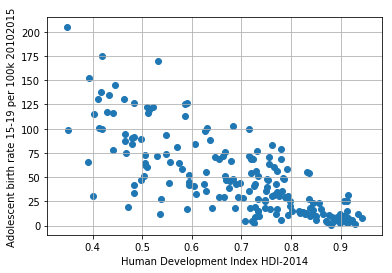

In [76]:
# Get data
x_feature_name = 'Human Development Index HDI-2014'
y_feature_name = 'Adolescent birth rate 15-19 per 100k 20102015'

x_data = GetColumn(x_feature_name)
y_data = GetColumn(y_feature_name)


# Make plot
plt.scatter(x_data, y_data)

plt.xlabel(x_feature_name)
plt.ylabel(y_feature_name)
plt.grid()

plt.show()

## <font color="red">Exercise: Plotting a histogram of Human Development Index (5 minutes)</font>
    - Plot a histogram of the Human Development Index feature with 15 bins
    - Be sure to label the axes

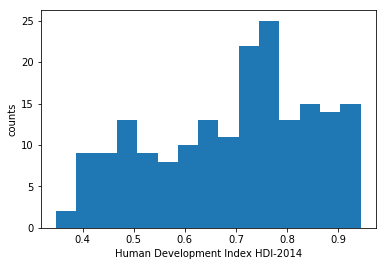

In [77]:
#########################
# Insert solution here! #
#########################

column_name = 'Human Development Index HDI-2014'
data = GetColumn(column_name)
plt.hist(data, bins = 15)
plt.xlabel(column_name)
plt.ylabel('counts')
plt.show()

## <font color="red">Exercise: Creating a scatterplot function (10 minutes)</font>
- Create a function that takes in two column names and plots the data as a scatter plot
- The function should include two optional arguments that allow the user to specify the x/y range--if desired

In [111]:
#########################
# Insert solution here! #
#########################

def CreateScatterplot(feature_name_x, feature_name_y, xrange = None, yrange = None):
    # Data
    x_data = GetColumn(feature_name_x)
    y_data = GetColumn(feature_name_y)
    plt.scatter(x_data, y_data)
    
    if xrange != None:
        plt.xlim(xrange[0], xrange[1])
    if yrange != None:
        plt.ylim(yrange[0], yrange[1])
        
        
    # Cosmetics
    plt.xlabel(feature_name_x)
    plt.ylabel(feature_name_y)
        
    plt.show()

## <font color="red">Exercise: Plotting prison population vs human development index (10 minutes)</font>
- Create a scatter plot of 'Prison Population per 100k people' vs 'Human Development Index'
- Are there any noticable outliers?
    - If so, pick a couple outliers and determine which country they belong to
        - Hints: 
            - Use the `np.where()` function to 'slice' out the elements in a column with a particular range
            - For instance, you could use `np.where(GetColumn(feature_1) > 0.5)` to find all of the elements where the 'feature_1' column is greater than 0.5
            - Use `np.where()` again for the other feature
            - Look for mutual data points shared between the two np.where() results; this is the country within the specified bounds
            - You can use the `np.intersect1d()` function to manually find the shared element
        

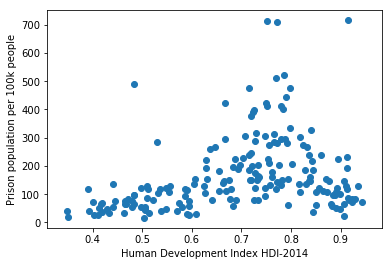

United States
Rwanda


In [109]:
#########################
# Insert solution here! #
#########################

feature_name_x = 'Human Development Index HDI-2014'
feature_name_y = 'Prison population per 100k people'

CreateScatterplot(feature_name_x, feature_name_y)


# Get top-right outlier
hdi_slice = np.where(GetColumn(feature_name_x) > 0.9)
prison_slice = np.where(GetColumn(feature_name_y) > 600)
print(countries[np.intersect1d(hdi_slice,prison_slice)[0]])



# Get top-left outlier
hdi_slice = np.where((GetColumn(feature_name_x) > 0.4) & (GetColumn(feature_name_x) < 0.6))
prison_slice = np.where(GetColumn(feature_name_y) > 400)
print(countries[np.intersect1d(hdi_slice,prison_slice)[0]])

## <font color="red">Exercise: Correlated and uncorrelated data(10 minutes)</font>
- Create a scatter plot of 'Human Development Index...' vs 'Carbon dioxide emissions...'
    - Does the relationship make sense to you? Why or why not?
- Now create a scatter plot of 'Gender Inequality Index...' vs 'Forest area percentage of total land area 2012'
    - How does this plot differ from the previous plot?

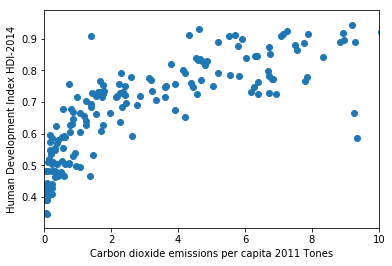

In [114]:
x_column_name = 'Carbon dioxide emissions per capita 2011 Tones'
y_column_name = 'Human Development Index HDI-2014'

CreateScatterplot(x_column_name, y_column_name, xrange=[0,10])

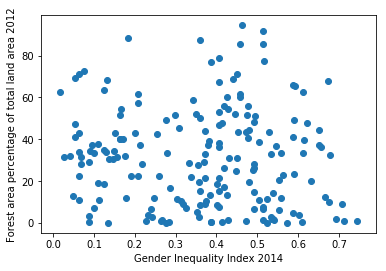

In [116]:
x_column_name = 'Gender Inequality Index 2014'
y_column_name = 'Forest area percentage of total land area 2012'

CreateScatterplot(x_column_name, y_column_name)

# Covariance and Correlation matrices
- So far in our exploratory data analysis we've looked for relationships between variables manually by plotting their scatter plots
- Correlation matrices are a means of quantifying relationships between pairs of variables

- The covariance of two variables $X$ and $Y$ is given by
$$ 
\begin{align}
        \mathrm{cov}\left(X,Y\right)=\Sigma_{XY}&=E\left[\left(X-\mu_{X}\right)\left(Y-\mu_{Y}\right)\right] \\
        \Sigma_{XY}&=\frac{\sum_{i}\left(x_{i}-\mu_{X}\right)\left(y_{i}-\mu_{Y}\right)}{N}\\
        \Sigma_{XY}&=\frac{1}{N}\left[\left(x_{1}-\mu_{X}\right)\left(y_{1}-\mu_{Y}\right)+\left(x_{2}-\mu_{X}\right)\left(y_{2}-\mu_{Y}\right)+...+\left(x_{N}-\mu_{X}\right)\left(y_{N}-\mu_{Y}\right)\right],
\end{align}  
$$

where X is a vector of a feature across all $N$ samples $X=\left(x_{1}, x_{1}, ..., x_{N}\right)$ and $\mu_{X}$ is the average of $X$.

Notice that $\Sigma_{XX}=E\left[\left(X-\mu_{X}\right)\left(X-\mu_{X}\right)\right]=E\left[\left(X-\mu_{X}\right)^{2}\right]=\sigma^{2}_{X}$---** the covariance of a vector with itself is its variance **

The covariance can be positive, negative, or zero depending on three cases:

- ** Positive **: If $x_{i}-\mu_{X}$ is positive, then $y_{i}-\mu_{Y}$ tends to be positive as well
    - This means that when $x_{i}$ is above its average value, $y_{i}$ tends to be above its average value as well
- ** Zero **: $x_{i}-\mu_{x}$ and $y_{i}-\mu_{y}$ change between positive and negative independent of each other; for some values, they are above average together, for others they are below average together
- ** Negative **: $x_{i}$ tends to be above average when $y_{i}$ tends to be below average

- Covariance gives us a means of quantifying a relationship between two variables


- For $K$ variables we can calculate the covariance of all pairs and put it into a $K\times K$ matrix $\Sigma$


### \begin{bmatrix}
    \sigma_{X_{1}X_{1}} & \Sigma_{X_{1}X_{2}} & \Sigma_{X_{1}X_{3}} & \dots & \Sigma_{X_{1}X_{K}} \\
    \Sigma_{X_{2}X_{1}} & \sigma_{X_{2}X_{2}} & \Sigma_{X_{2}X_{3}} & \dots & \Sigma_{X_{2}X_{K}} \\
    \Sigma_{X_{3}X_{1}} & \Sigma_{X_{3}X_{2}} & \sigma_{X_{3}X_{3}} & \dots & \Sigma_{X_{3}X_{K}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \Sigma_{X_{K}X_{1}} & \Sigma_{X_{K}X_{2}} & \Sigma_{X_{K}X_{3}} & \dots & \sigma_{X_{K}X_{K}} \\
\end{bmatrix}

- The covariance matrix is nice, but difficult to interpret because it is not *scale invariant*---the relative magnitude of covariances between different variables is impossible to interpret; the only conclusion we can draw is about the sign of the covariance
- It would be nice if we had a means of *standardizing* the covariances so that they were comparable
- One way to *standardize* the covariance matrix is by dividing each element $\Sigma_{X_{i}X_{j}}$ by $\sqrt{\sigma_{X_{i}}\sigma_{X_{j}}}$, which will scale all $\Sigma_{X_{i}X_{j}}$ to the range $\{-1,1\}$
- Why? 
    - Covariance is maximized when both vectors are exactly equal, in which case the covariance $\Sigma_{X_{i}X_{j}}$ and scaling factor $\sqrt{\sigma_{X_{i}}\sigma_{X_{j}}}^{-1}$ are both equal to the standard deviation, and the term goes to 1
    - Covariance is **minimized** when both vectors have equal magnitude but opposite direction, in which case the term goes to -1
    - Therefore, all covariances rescaled by $\left(\sqrt{\sigma_{X_{i}}\sigma_{X_{j}}}\right)^{-1}$ are in the range $\{-1,1\}$, enabling meaningful comparison between them
    - The resulting matrix is known as the correlation matrix, and each of its elements is the **Pearson correlation coefficient** of two vectors
    
 
### \begin{bmatrix}
    1 & \frac{\Sigma_{X_{1}X_{2}}}{\sqrt{\sigma_{X_{1}}\sigma_{X_{2}}}} & \frac{\Sigma_{X_{1}X_{3}}}{\sqrt{\sigma_{X_{1}}\sigma_{X_{3}}}} & \dots & \frac{\Sigma_{X_{1}X_{K}}}{\sqrt{\sigma_{X_{1}}\sigma_{X_{K}}}} \\
    \frac{\Sigma_{X_{2}X_{1}}}{\sqrt{\sigma_{X_{2}}\sigma_{X_{1}}}} & 1 & \frac{\Sigma_{X_{2}X_{3}}}{\sqrt{\sigma_{X_{2}}\sigma_{X_{3}}}} & \dots & \frac{\Sigma_{X_{2}X_{K}}}{\sqrt{\sigma_{X_{2}}\sigma_{X_{K}}}} \\
    \frac{\Sigma_{X_{3}X_{1}}}{\sqrt{\sigma_{X_{3}}\sigma_{X_{1}}}} & \frac{\Sigma_{X_{3}X_{2}}}{\sqrt{\sigma_{X_{3}}\sigma_{X_{2}}}} & 1 & \dots & \frac{\Sigma_{X_{3}X_{K}}}{\sqrt{\sigma_{X_{3}}\sigma_{X_{K}}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{\Sigma_{X_{K}X_{1}}}{\sqrt{\sigma_{X_{K}}\sigma_{X_{1}}}} & \frac{\Sigma_{X_{K}X_{2}}}{\sqrt{\sigma_{X_{K}}\sigma_{X_{2}}}} & \frac{\Sigma_{X_{K}X_{3}}}{\sqrt{\sigma_{X_{K}}\sigma_{X_{3}}}} & \dots & 1 \\
\end{bmatrix}
    
    
- One easy way to calculate the correlation matrix is by **standardizing** your data set by subtracting the data for each feature by that feature's mean, and dividing by its standard deviation

$$ X'=\frac{\left(X-\mu_{X}\right)}{\sigma_{X}} $$

- In this case, the correlation matrix of $X$ is simply the covariance matrix of $X'=X'^{T}X$

## <font color="red">Exercise: Standardize the numpy array and plot correlation matrix (10 minutes)</font>
- Create a new numpy data array called X_std that has been standardized
- Plot the correlation matrix using plt.imshow(); choose a meaningful colormap from one of the options on [this page](https://matplotlib.org/examples/color/colormaps_reference.html)
    - Hint: colormap can be specified with plt.imshow(matrix_name, cmap = [insert cmap name])

In [118]:
X_std = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)

In [119]:
correlation_matrix = np.dot(X_std.T, X_std)

In [120]:
print(correlation_matrix)

[[ 188.          -68.4358673  -141.21919136 ...,   26.27635391
  -113.09878468 -162.50115768]
 [ -68.4358673   188.           76.24933221 ...,   34.79133942
    36.60550322   55.8230093 ]
 [-141.21919136   76.24933221  188.         ...,  -15.7758251    77.48631365
   142.08961623]
 ..., 
 [  26.27635391   34.79133942  -15.7758251  ...,  188.          -26.44696871
   -18.4239567 ]
 [-113.09878468   36.60550322   77.48631365 ...,  -26.44696871  188.
   122.27255617]
 [-162.50115768   55.8230093   142.08961623 ...,  -18.4239567   122.27255617
   188.        ]]


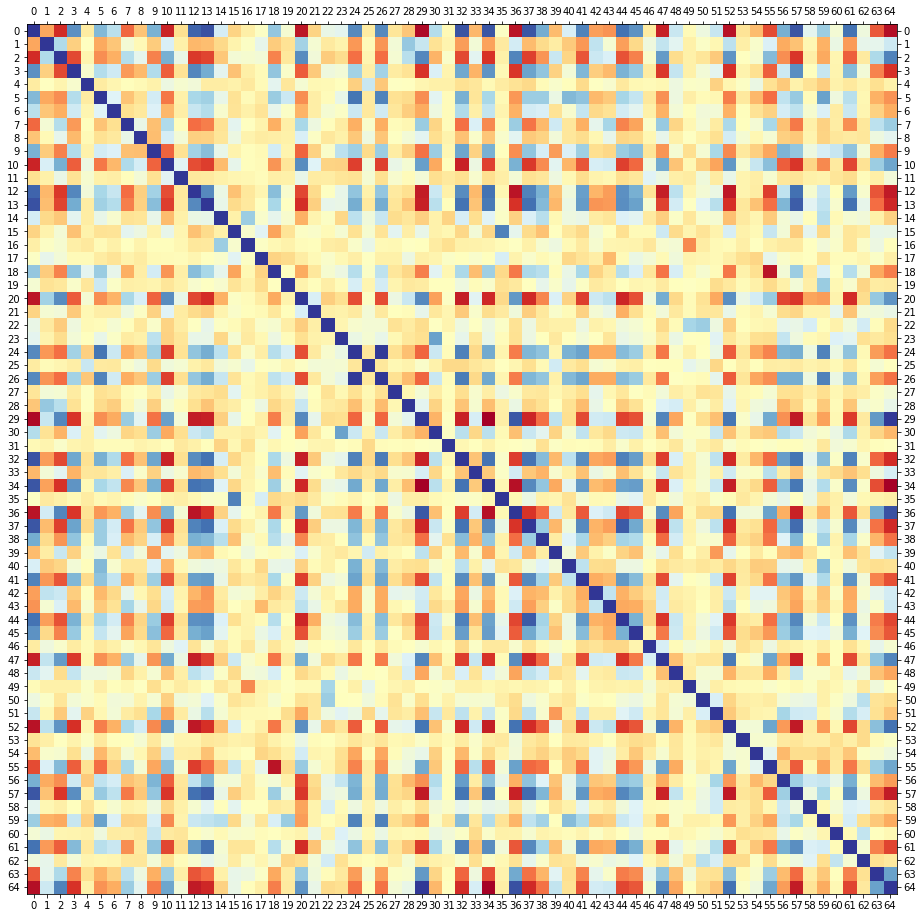

In [130]:
fig = plt.figure(figsize = (16,16))
plt.imshow(correlation_matrix, cmap = 'RdYlBu')
plt.xticks(range(correlation_matrix.shape[0]))
plt.yticks(range(correlation_matrix.shape[1]))




plt.tick_params(axis='both', which='both', labelleft = 'on', labelright = 'on', labeltop = 'on')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

plt.show()

## Some caveats about correlation...
![correlation pic](./images/correlation_dependence.png)

- Correlation is useful to see if two variables are related
- However, correlation is only a measure of ** linear ** dependence and doesn't yield much useful information about higher order relationships!
- Nothing beats plotting all of the variables and looking at their relationship :)